# Exploratory Data Analysis for Presidential Election by County Project

Bar chart of feature importances from the final model.  

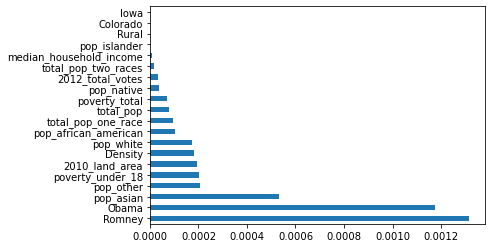

Fill the tool box.

In [ ]:
import folium
import json
import pandas as pd
import vincent
import numpy as np
from pickle import load
from pickle import dump
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)
import matplotlib.pyplot as plt


# ------------------------------------------Data Prep-------------------------------------------------------

Import location data for counties.  
https://public.opendatasoft.com/explore/dataset/us-county-boundaries/table/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name  
FIPS are unique numeric identifiers for each US county. FIPS is a feature in the main dataset and is included in this geojson file.

In [ ]:
import json
with open('../data/USA_Counties.geojson') as f:
    zips_map = json.load(f)

Load preprocessed dataset.

In [ ]:
df1 = load(open('../PICKLES/all_with_fips.pkl', 'rb'))

Remove the word 'county' from values in one county column.

In [ ]:
df1['County_y'] = df1['County_y'].str.rstrip('County')

Change datatype of fips column. 

In [ ]:
df1.fips = df1.fips.astype(str)

Fill fips numbers to 5 digits. It was dropping leading zeros and causing the two data sets to not match.

In [ ]:
df1.fips = df1.fips.str.zfill(5)

# --------------------------------------Target Analysis---------------------------------------------------

### Map of 2016 winner

In [ ]:
df1['Winner'] = df1['Target']

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df1, geojson= zips_map, color="Winner",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Clinton': '#66B2FF', 'Trump': '#FF6666'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Pie Chart of Target Distribution

Donald Trump won 84.5 % of US counties in 2016.

In [ ]:
labels = ['Trump', 'Clinton']
fig1, ax1 = plt.subplots()
ax1.pie(df1.Target.value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['#FF6666', '#66B2FF'], labels = labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Pie Chart of Popular Vote

This is included as illustration to show the difference between the popular vote and how counties as a whole voted.

In [ ]:
target = load(open('../PICKLES/target_df.pkl', 'rb'))

In [ ]:
target['Clinton'] = pd.to_numeric(target['Clinton'])
target['Trump'] = pd.to_numeric(target['Trump'])

In [ ]:
target.Clinton.sum()

In [ ]:
target.Trump.sum()

In [ ]:
labels = 'Clinton', 'Trump'
sizes = [62298328, 60995541]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['#66B2FF', '#FF6666'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# -------------------------------Previous Election Analysis-----------------------------------------

### Map of 2012 winner

Romney won 2440 counties and Obama won 701.

In [ ]:
(df1['Obama'] < df1['Romney']).value_counts()

In [ ]:
conditions = [(df1['Obama'] < df1['Romney']), (df1['Obama'] > df1['Romney'])]
choices = ['Romney', 'Obama']
df1['2012 Election Winner'] = np.select(conditions, choices, default = np.nan)

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df1, geojson= zips_map, color="2012 Election Winner",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Obama': '#66B2FF', 'Romney': '#FF6666'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Map of Swing Counties

Of the 3141 counties(or equivalents) in the US, 253 of them swung in 2016. 92% of those swung Republican.

In [ ]:
conditions = [((df1['Target'] == 'Trump') & (df1['2012 Election Winner'] == 'Romney')),  
               ((df1['Target'] == 'Clinton') & (df1['2012 Election Winner'] == 'Obama')),
             ((df1['Target'] == 'Clinton') & (df1['2012 Election Winner'] == 'Romney')), 
                ((df1['Target'] == 'Trump') & (df1['2012 Election Winner'] == 'Obama'))]
choices = ['Stayed the same', 'Stayed the same', 'Swung to Democrats', 'Swung to Republicans']
df1['Swing Counties'] = np.select(conditions, choices, default = np.nan)

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df1, geojson= zips_map, color="Swing Counties",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Stayed the same': 'white', 'Swung to Republicans': '#FF6666', 'Swung to Democrats': '#66B2FF'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Further analysis of these clusters would be interesting.  
- Maine  
- Washington and Oregon    
- Iowa, Wisconsin, Illinois
- Minnesota
- Southern Colorado, Northern New Mexico
- Alaska!

# ---------------------Population of Asian Descent Analysis------------------------------------

This is the total population of people who reported being a single race and chose Asian. This is not a rate.

### Map of Asian Populations

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(df1, geojson= zips_map, color="pop_asian",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2, 
                          color_continuous_scale="Greens")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Interesting Areas:
- Houston Area  
- LA and surrounding counties  
- San Jose, CA area  
- King County, WA (Seattle area)  
- Phoenix  
- Chicago  

### Map of 50 Counties with Highest Asian American Population

46 of these counties voted for Hillary Clinton.

In [ ]:
highest_asian_pop = df1.sort_values(by = 'pop_asian', ascending = False)

In [ ]:
highest_asian_pop.head()

In [ ]:
highest_asian_pop.iloc[50:, 21] = 0

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(highest_asian_pop, geojson= zips_map, color="Target",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Trump': '#FF6666', 'Clinton': '#66B2FF', 0: 'white'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Map of 50 Counties with Lowest Population of People of Asian Descent

37 of these counties have 0 people of Asian descent. The other 13 have 1.  

48 of these counties voted for Donald Trump.

In [ ]:
lowest_asian_pop = df1.sort_values(by = 'pop_asian', ascending = True)

In [ ]:
lowest_asian_pop.iloc[50:, 21] = 0

In [ ]:
lowest_asian_pop.head(50)

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(lowest_asian_pop, geojson= zips_map, color="Target",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Trump': '#FF6666', 'Clinton': '#66B2FF', 0: 'white'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# ------------------------------Children in Poverty Analysis----------------------------------------

Total number of children in poverty is the feature in the model. Keep in mind that this is not a rate. This is the number of people under 18 who are in poverty.

### Map of 50 Counties with Highest Number of Children in Poverty

44 of these counties voted for Hillary Clinton.

In [ ]:
highest_child_poverty = df1.sort_values(by = 'poverty_under_18', ascending = False)

In [ ]:
highest_child_poverty.iloc[50:, 21] = 0

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(highest_child_poverty, geojson= zips_map, color="Target",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Trump': '#FF6666', 'Clinton': '#66B2FF', 0: 'white'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Map of 50 Counties with Lowest Number of Children in Poverty

48 of these counties voted for Donald Trump.

In [ ]:
lowest_child_poverty = df1.sort_values(by = 'poverty_under_18')

In [ ]:
lowest_child_poverty.iloc[50:, 21] = 0

In [ ]:
import plotly.express as px

fig = px.choropleth_mapbox(lowest_child_poverty, geojson= zips_map, color="Target",
                           locations="fips", featureidkey="properties.FIPS",
                           center={"lat": 31.5, "lon": -99.9},
                           mapbox_style="white-bg", zoom=2,
                           color_discrete_map = {'Trump': '#FF6666', 'Clinton': '#66B2FF', 0: 'white'})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Map of Childhood Poverty Rate

*This model does not include childhood poverty as a rate but I wanted to look into it.*  
The average childhood poverty rate in the US is 4.75%.

In [ ]:
avg_child_poverty_rate = (df1.poverty_under_18.sum() / df1.total_pop.sum()) *100
avg_child_poverty_rate

In [ ]:
df1['poverty_under_18_rate'] = (df1.poverty_under_18 / df1.total_pop)*100

Below is the code for the childhood poverty rate. I have pasted in an image with popouts from a slide show to look at instead.

In [ ]:
# import plotly.express as px

# fig = px.choropleth_mapbox(df1, geojson= zips_map, color="poverty_under_18_rate",
#                            locations="fips", featureidkey="properties.FIPS",
#                            center={"lat": 31.5, "lon": -99.9},
#                            mapbox_style="white-bg", zoom=2, 
#                           color_continuous_scale="Greens")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

These dark pockets are very interesting! Let's take a look.

## Additional Information about Pockets of High Childhood Poverty Rates
### Texas/Mexico Border
**Zapata County, TX**: Named for Colonel José Antonio de Zapata, a rancher in the area who rebelled against Mexico. 84% Hispanic  
**Dimmit County, TX**: It's named for Philip Dimmitt, a major figure in the Texas Revolution. 85% Hispanic  
**Cameron County, TX**:  Named for Captain Ewen Cameron, a soldier during the Texas Revolution and in the ill-fated Mier Expedition. 88% Hispanic  
**Zavala County, TX**: Zavala is named for Lorenzo de Zavala, Mexican politician, signer of the Texas Declaration of Independence, and first vice president of the Republic of Texas. Housed an internment camp during WW2. 91% Hispanic (I recommend reading about this county. So interesting!)    
**Starr County, TX**: border. 97.7% hispanic    
**Maverick County, TX**: border 95% hispanic    

### Dakota Reservations
The Wounded Knee Occupation and the Standing Rock pipeline protests both took place on these reservations.  
**Mellette County, SD**: Rosebud Indian Reservation 54.1 % Native American    
**Corson County, SD**: Standing Rock Indian Reservation 67% Native American  
**Bennett County, SD**: The North American continental pole of inaccessibility. Pine Ridge Indian Reservation 61% Native American  
**Benson County, ND**: Spirit Lake Indian Reservation 55% Native American  
**Todd County, SD**: Rosebud Indian Reservation 88% Native American   
**Ziebach County, SD**: Cheyenne River Indian Reservation 72% Native American  
**Sioux County, ND**: Standing Rock Indian Reservation 84% Native American      
**Corson County, SD**: Standing Rock Indian Reservation, 60% Native American    
**Oglala Lakota, SD**: Pine Ridge Indian Reservation 94% Native American    
**Buffalo County, SD**: Crow Creek Indian Reservation 81% Native American    
**Jackson County, SD**: Pine Ridge Indian Reservation, 52% Native American    

### Mississippi Delta and Surrounding Counties
**Alexander County, IL**: along Miss River but probably not considered Delta. Between 2010 and 2020, the population of Alexander County decreased to 5,240. The percentage decline in the population of 36.4 percent was the largest of any of the 3,138 U.S. counties. Although the population of the county had been decreasing for decades, the closure of the Tamms Correctional Center in 2013 probably caused an acceleration of the decline in the 2010s. 60.9% White  
**Holmes County, Miss**: Delta. 83% African American      
**Pemiscot County, Missouri**: Delta. 72% White   
**Leflore County, Miss**: Delta. In the period from 1877 to 1950, Leflore County had 48 documented lynchings of African Americans, by far the highest number in the state. 72% African American    
**Humphreys County, Miss**: Catfish capital of the world 75% African American   
**Coahoma County, Miss**: Delta, 75.5% African American    
**Sharkey County, Miss**: Delta. 71% African American    
**Phillips County, Ark**: Delta. Ranks as the county with the highest number of lynchings in U.S. history. 63.1% African American    
**Quitman County, Miss**: Martin Luther King Jr. originally wanted the Poor People's Campaign to start in Quitman County because of the intense and visible economic disparity there. 69.6% African American    
**Washington County, Miss**:Delta 71% African American  

### Other
**Menominee County, WI**: Menominee Indian Reservation. 87% Native. Bluest county in Wisconsin in the 2020 election.  
**Perry County, Alabama**: 68.7% African American   
**Wilcox County, Alabama**: 72.5% African American     
**Atkinson County, Georgia**: 67% white   
**Dallas County, Alabama**: County seat is Selma. 69% African American  
**Kusilvak County, AK**: 92% Native. Not a reservation and seems to have many people groups.  

### Histogram of Childhood Poverty Rate and Target

In [ ]:
Trump = df1.loc[df1.Target == 'Trump']
Clinton = df1.loc[df1.Target == 'Clinton']

In [ ]:
x = Clinton.poverty_under_18_rate
z = Trump.poverty_under_18_rate

In [ ]:
plt.hist(z, bins = 30, ec = 'k', stacked = True, color = 'red', density = True)
plt.hist(x, bins = 30, ec = 'k', stacked = True, color = 'blue', density = True, alpha = .7)

# ----------------------------------------------Density------------------------------------------------------


In [ ]:
plt.hist(df1.loc[df1['Density']> 1]['Density'], bins = 2, ec = 'k', stacked = True, color = 'red', density = True)

In [ ]:
df1.loc[df1[df1.Density.between(5, 4000)] & df1[df1['2010_land_area'] < 10000]]

In [ ]:
df1.Density.mean()

In [ ]:
highest_density = df1.sort_values(by = 'Density', ascending = False).head(100)
lowest_density = df1.sort_values(by = 'Density', ascending = True).head(100)


In [ ]:
lowest_density.head(50)

In [ ]:
plt.scatter(df1[df1.Density.between(50, 2000)]['Density'], df1[df1.Density.between(50, 2000)]['2010_land_area'])

In [ ]:
plt.scatter(lowest_density.Density, lowest_density.poverty_under_18_rate)

In [ ]:
plt.scatter(df1.Density, df1['2010_land_area'])

# ----------------------------Features to Explore in the Future------------------------------------

- Density
- Model Predictions
    - Map of predictions
    - Analysis of missed counties
- Land Area
- Population Other (people who identified as one race but none of the available options in the census) I suspect we might have some interesting characters in there.